<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/%EA%B5%B0%EC%A7%91%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%2B_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
!wget https://bit.ly/fruits_300_data -0 fruits_300.npy
fruits=np.load('fruits_300.npy')

wget: invalid option -- '0'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [3]:
fruits_2d=fruits.reshape(-1,100*100)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca=PCA(n_components=50)
#PCA객체 생성후, 주성분 개수를 50으로 생성 
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape)
#주성분의 형태 출력 50개의 주성분 데이터의 특성개수 만개 

(50, 10000)


In [18]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  #한줄에 10개씩 이미지를 그림. 샘플개수를 10으로 나누어 전체 행 개수를 계산 
  cols= n if rows<2 else 10 
  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      
  plt.show()
  #그림 출력 

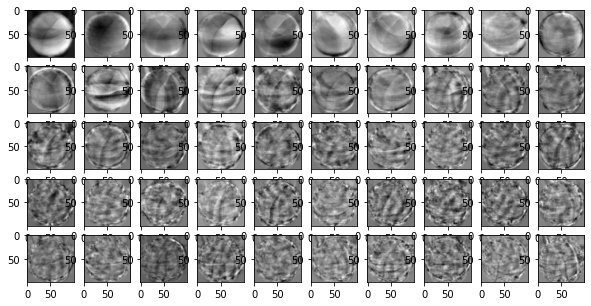

In [19]:
draw_fruits(pca.components_.reshape(-1,100,100))
#주성분을 100x100 크기의 이미지로 출력 

In [20]:
fruits_pca=pca.transform(fruits_2d)
#transform()을 통해서 원본 데이터의 차원을 50으로 줄임
print(fruits_pca.shape)

(300, 50)


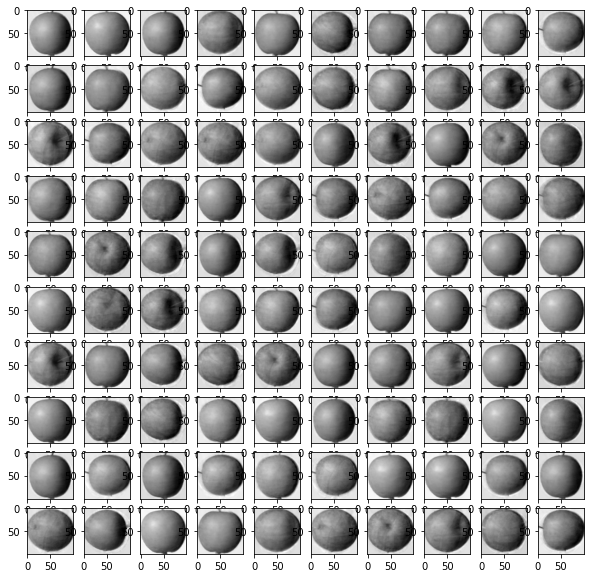

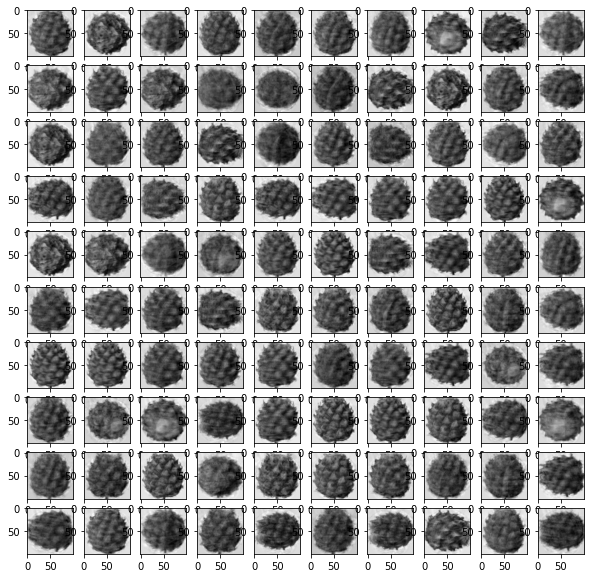

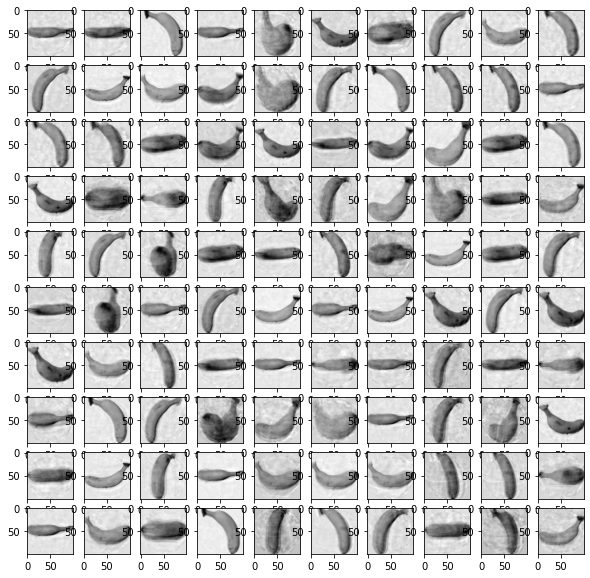

In [23]:
fruits_inverse=pca.inverse_transform(fruits_pca)
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
#데이터를 100X100의 크기로 바꿈 
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")


In [24]:
print(np.sum(pca.explained_variance_ratio_))
#각 주성분의 설명된 분산 비율을 기록 
#50개의 주성분으로 표현하고 있는 총 분산 비율을 얻음 

0.921530343081061


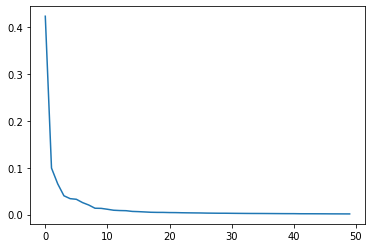

In [25]:
plt.plot(pca.explained_variance_ratio_)